# House prices advanced regression techniques

Importing useful libraries:
- pandas: used for loading data and manipulation
- pyplot: plotting and visualizing data
- numpy: linear algebra/matrix, vector manipulation library
- sklearn: modules for preprocessing, predicting, encoding and also scoring

In [44]:
# basic imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# sklearn
# preprocessing, model selection and metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# models
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# visualize importances
import shap

pd.set_option('max_columns', None)

In [45]:
plt.style.use('ggplot')

## Diary
21/09: Submission without handling label data got 0.16 MSE. Still need to make some progress

In [2]:
def print_metrics(y_true, y_pred):
    print("RMSE {}".format(np.sqrt(mean_squared_error(y_true, y_pred))))
    print("MAE {}".format(mean_absolute_error(y_true, y_pred)))

## Reading data

In [3]:
train_df = pd.read_csv('/home/tuts/datasets/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('/home/tuts/datasets/house-prices-advanced-regression-techniques/test.csv')

In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_df.shape

(1460, 81)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Encoding data

Labeled data needs to be encoded. Machine learning models cannot understand or use strings to make prediction. There are a couple of methods that enable us to make such transformations, being the most common ones Label Encoding and One Hot Encoding. 

Given that our dataset contains only a few samples, applying One Hot Encoding to all categorical features would increase the number of features at a point that it will be hard for us to make predictions. So, we are going to use the good old Label Encoding.

### Checking columns that contain _object_ datatype

In [8]:
object_types = train_df.select_dtypes(include='object').columns
object_types

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [9]:
le = LabelEncoder()

for obj_col in object_types:
    train_df[obj_col] = le.fit_transform(train_df[obj_col].astype(str))

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Now we have all columns as numeric features. LabelEncoding assigns a numeric value to each object/string in a given column.

## Using a subset of columns

Some columns have lots of missing values. Lets replace them with meaninful data.

```.isna()``` is the same as ```.isnull()```, so we can use either of them to check for null values.

In [14]:
print(train_df.isna().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


We may capture only the columns that have NaNs and treat them separately

In [16]:
columns_with_nans = train_df.columns[train_df.isna().any()].tolist()
columns_with_nans

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [21]:
train_df.LotFrontage.isna().sum()

259

In [22]:
train_df.MasVnrArea.isna().sum()

8

In [24]:
train_df.GarageYrBlt.isna().sum()

81

Given that we have few samples on the dataset, its better to impute values where we found NaNs

In [25]:
train_df.LotFrontage.fillna(train_df.LotFrontage.median(), inplace=True)
train_df.MasVnrArea.fillna(train_df.LotFrontage.median(), inplace=True)
train_df.GarageYrBlt.fillna(train_df.LotFrontage.median(), inplace=True)

Verifying that we don't have any NaNs in the dataset:

In [27]:
train_df.isna().any().any()

False

## Select columns for training

In [28]:
# train_df = train_df.drop(labels=['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'Id', 'FireplaceQu'], axis=1)
use_cols = ['LotArea', 'YrSold', 'MoSold', 'MiscVal','PoolArea','ScreenPorch',
              'OpenPorchSF','WoodDeckSF','GarageArea','GarageCars','Fireplaces', 
              'KitchenAbvGr', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'GrLivArea',
              'YearBuilt', 'OverallQual', 'OverallCond', 'MSSubClass']
X = train_df[use_cols]
X.head()

,LotArea,YrSold,MoSold,MiscVal,PoolArea,ScreenPorch,OpenPorchSF,WoodDeckSF,GarageArea,GarageCars,Fireplaces,KitchenAbvGr,BedroomAbvGr,FullBath,HalfBath,GrLivArea,YearBuilt,OverallQual,OverallCond,LotArea,MSSubClass
0,8450,2008,2,0,0,0,61,0,548,2,0,1,3,2,1,1710,2003,7,5,8450,60
1,9600,2007,5,0,0,0,0,298,460,2,1,1,3,2,0,1262,1976,6,8,9600,20
2,11250,2008,9,0,0,0,42,0,608,2,1,1,3,2,1,1786,2001,7,5,11250,60
3,9550,2006,2,0,0,0,35,0,642,3,1,1,3,1,0,1717,1915,7,5,9550,70
4,14260,2008,12,0,0,0,84,192,836,3,1,1,4,2,1,2198,2000,8,5,14260,60


In [29]:
y = train_df.SalePrice

## Training

Now we are trying to set a baseline for a regressor. I tried the most common ones:
- Linear Regression with L1 and L2 regularization, normalizing the data before prediction
- Random Forest Regressor, given its robustness and advantages of being a tree (default is set to 100 trees) classifier
- Ada Boost regressor

### Baseline

In [30]:
l1 = Lasso(normalize=True)
l2 = Ridge(normalize=True, solver='lsqr')
rf = RandomForestRegressor()
ab = AdaBoostRegressor()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
X_train.describe()

,LotArea,YrSold,MoSold,MiscVal,PoolArea,ScreenPorch,OpenPorchSF,WoodDeckSF,GarageArea,GarageCars,Fireplaces,KitchenAbvGr,BedroomAbvGr,FullBath,HalfBath,GrLivArea,YearBuilt,OverallQual,OverallCond,LotArea,MSSubClass
count,1022.000000,1022.000000,1022.000000,1022.00000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,10606.595890,2007.811155,6.244618,49.39726,2.077299,14.989237,47.097847,92.093933,472.128180,1.769080,0.612524,1.046967,2.859100,1.576321,0.386497,1524.692759,1971.364971,6.101761,5.539139,10606.595890,57.524462
std,10485.061376,1.347015,2.688322,584.17093,33.237561,54.842173,68.336741,123.528189,216.006349,0.761142,0.649387,0.225125,0.833734,0.554164,0.508819,541.563056,30.601205,1.411932,1.115264,10485.061376,42.671982
min,1300.000000,2006.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,1872.000000,1.000000,1.000000,1300.000000,20.000000
25%,7606.750000,2007.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,326.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1131.750000,1953.000000,5.000000,5.000000,7606.750000,20.000000
50%,9544.500000,2008.000000,6.000000,0.00000,0.000000,0.000000,24.500000,0.000000,480.000000,2.000000,1.000000,1.000000,3.000000,2.000000,0.000000,1470.000000,1972.500000,6.000000,5.000000,9544.500000,50.000000
75%,11546.250000,2009.000000,8.000000,0.00000,0.000000,0.000000,70.000000,168.000000,576.000000,2.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1787.750000,2000.000000,7.000000,6.000000,11546.250000,70.000000
max,215245.000000,2010.000000,12.000000,15500.00000,576.000000,480.000000,547.000000,857.000000,1418.000000,4.000000,3.000000,3.000000,8.000000,3.000000,2.000000,5642.000000,2010.000000,10.000000,9.000000,215245.000000,190.000000


In [35]:
print(X_train.isnull().values.any())
print(y_train.isnull().values.any())

False
False


In [36]:
l1.fit(X_train, y_train)
l2.fit(X_train, y_train)
rf.fit(X_train, y_train)
ab.fit(X_train, y_train)

AdaBoostRegressor()

In [37]:
yhat_l1 = l1.predict(X_test)
yhat_l2 = l2.predict(X_test)
yhat_rf = rf.predict(X_test)
yhat_ab = ab.predict(X_test)

print("L1:")
print_metrics(y_test, yhat_l1)
print("L2:")
print_metrics(y_test, yhat_l2)
print("RF:")
print_metrics(y_test, yhat_rf)
print("AB:")
print_metrics(y_test, yhat_ab)

L1:
RMSE 34128.813762876045
MAE 21824.79511691336
L2:
RMSE 42441.59682029327
MAE 25645.424790369776
RF:
RMSE 30157.679660255748
MAE 19432.758614916285
AB:
RMSE 33971.356151723754
MAE 24744.613598078227


Given the metrics, Random Forest seems better, but we also need to tweak it a little bit

Now, we will apply cross validation to maximize the score of our regressor.
Its also important to remember that in this competition, we're looking to MSE (RMSE also works).

In [38]:
scores = cross_val_score(rf, X, y, cv=5, scoring='neg_root_mean_squared_error')
-scores

array([28110.97914045, 37070.29378344, 34681.99141013, 26474.81055497,
       40723.47234944])

In [39]:
-scores.mean()

33412.30944768499

## GridSearch for hyperparameters

First, lets take a look at the feature importance of our estimator.

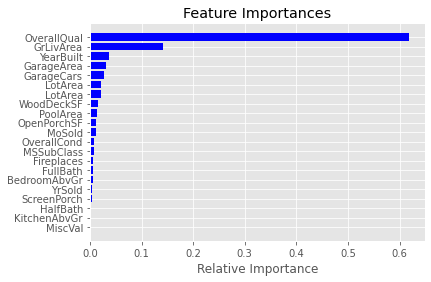

In [46]:
feature_importance = rf.feature_importances_
indices = np.argsort(feature_importance)
columns = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [53]:
explainer = shap.TreeExplainer(rf)
shap_values_test = explainer.shap_values(X_test)
shap_values_train = explainer.shap_values(X_train)

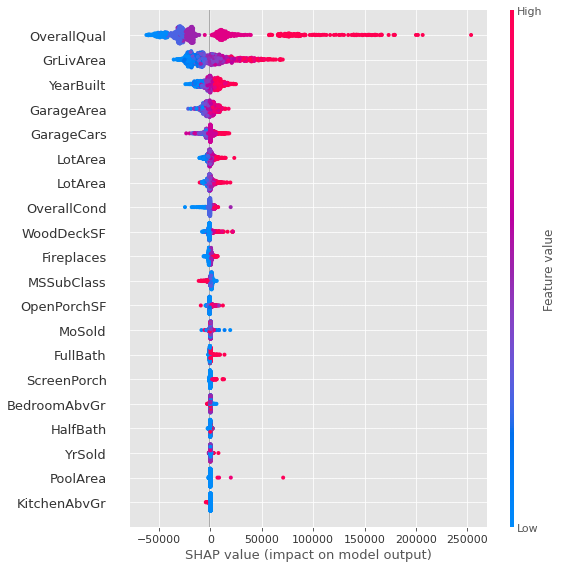

In [59]:
shap.summary_plot(shap_values_train, X_train)

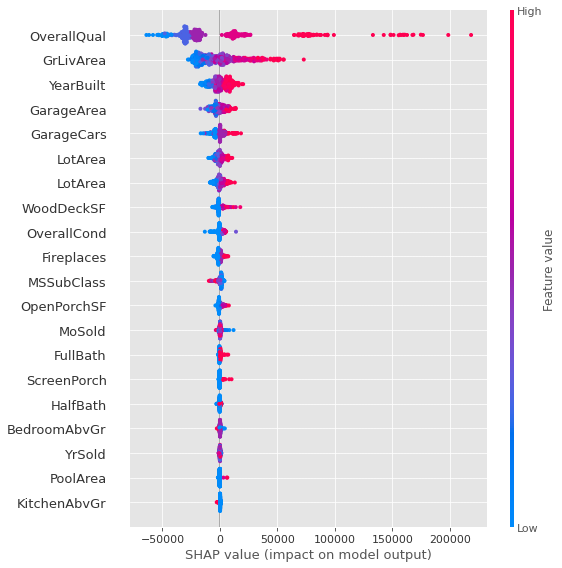

In [60]:
shap.summary_plot(shap_values_test, X_test)

## Training (Finally)

## Submission

In [33]:
X_test = test_df[use_cols]
X_test.info()

In [35]:
X_test.isna().sum()

LotArea         0
YrSold          0
MoSold          0
MiscVal         0
PoolArea        0
ScreenPorch     0
OpenPorchSF     0
WoodDeckSF      0
GarageArea      1
GarageCars      1
Fireplaces      0
KitchenAbvGr    0
BedroomAbvGr    0
FullBath        0
HalfBath        0
GrLivArea       0
YearBuilt       0
OverallQual     0
OverallCond     0
LotArea         0
MSSubClass      0
dtype: int64

In [38]:
garage_area_med = X_test.GarageArea.median()
garage_cars_med = X_test.GarageCars.median()

X_test.GarageArea = X_test.GarageArea.fillna(garage_area_med)
X_test.GarageCars = X_test.GarageCars.fillna(garage_cars_med)

y_pred = rf.predict(X_test)

## Submission

In [46]:
my_submission = pd.DataFrame({'Id': test_df.Id, 'SalePrice': y_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)